In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [13]:
%cd /home/bijanadmin/Desktop/Goose_data/

/home/bijanadmin/Desktop/Goose_data


In [14]:
os.listdir('/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2')

['sleep', 'move', '.ipynb_checkpoints']

In [15]:
#selected subset of dates. 
val_dates = ['180328','180329']
test_dates = ['180330','180331']

train_loader, val_loader, test_loader = create_dataloaders(val_dates=val_dates, test_dates=test_dates, batch_size=128, version='_Goose_all_2', upsample=True)

In [16]:
len(train_loader), len(val_loader), len(test_loader)

(446, 21, 49)

In [17]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180409, rec:005, time:1120.0


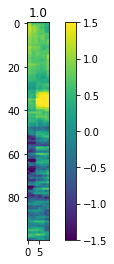

date:180410, rec:003, time:5695.0


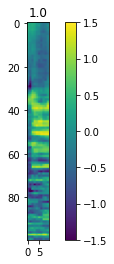

date:180401, rec:001, time:5137.0


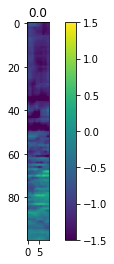

date:180410, rec:002, time:4369.0


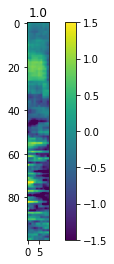

date:180325, rec:009, time:1610.0


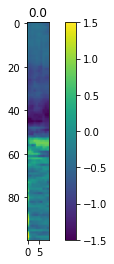

date:180410, rec:003, time:991.0


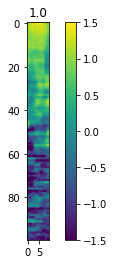

date:180410, rec:006, time:5642.0


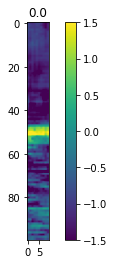

date:180325, rec:004, time:3250.0


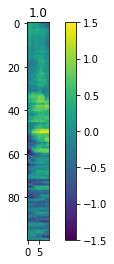

date:180327, rec:008, time:2372.0


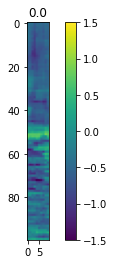

date:180414, rec:007, time:5818.0


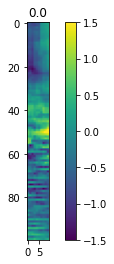

date:180327, rec:008, time:3372.0


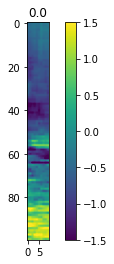

date:180324, rec:008, time:5174.0


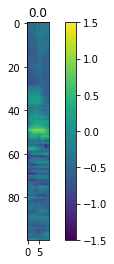

date:180327, rec:008, time:3992.0


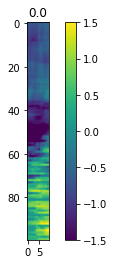

date:180327, rec:001, time:6802.0


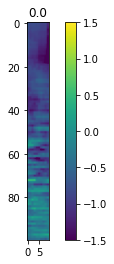

date:180412, rec:005, time:4417.0


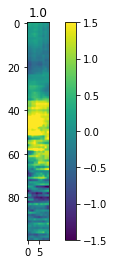

date:180327, rec:004, time:3115.0


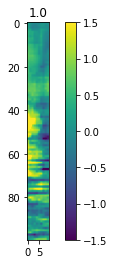

date:180413, rec:002, time:6881.0


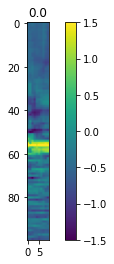

date:180412, rec:005, time:2205.0


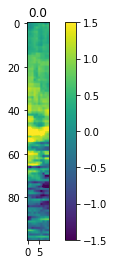

date:180409, rec:004, time:5595.0


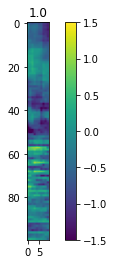

date:180414, rec:004, time:3256.0


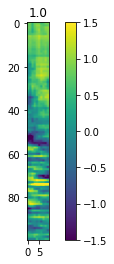

date:180325, rec:007, time:1903.0


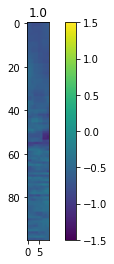

date:180324, rec:008, time:3573.0


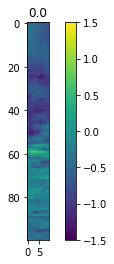

date:180323, rec:002, time:2876.0


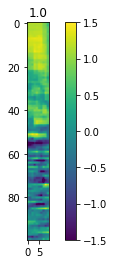

date:180412, rec:003, time:6568.0


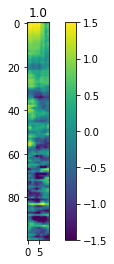

date:180413, rec:003, time:5098.0


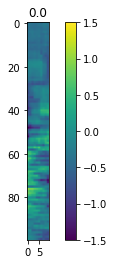

date:180412, rec:002, time:7011.0


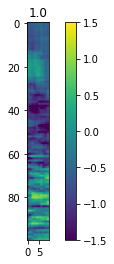

date:180413, rec:002, time:5881.0


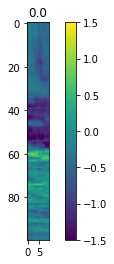

date:180413, rec:002, time:490.0


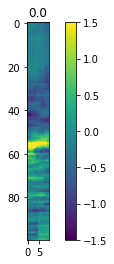

date:180413, rec:001, time:6087.0


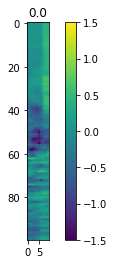

date:180327, rec:008, time:200.0


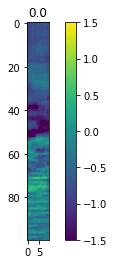

date:180324, rec:008, time:1651.0


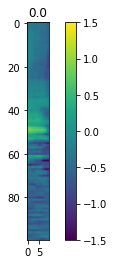

date:180324, rec:008, time:241.0


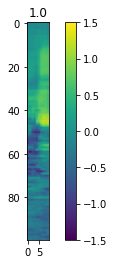

date:180327, rec:005, time:1150.0


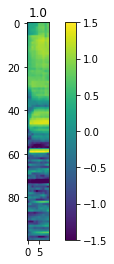

date:180327, rec:008, time:6929.0


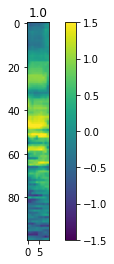

date:180325, rec:001, time:630.0


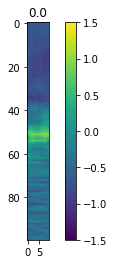

date:180322, rec:003, time:50.0


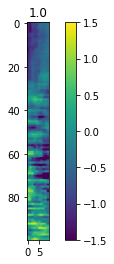

date:180413, rec:001, time:3573.0


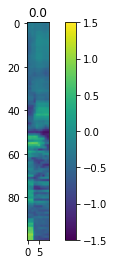

date:180324, rec:006, time:3829.0


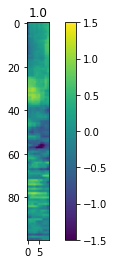

date:180324, rec:003, time:3017.0


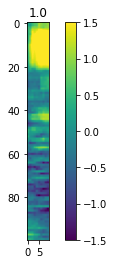

date:180401, rec:001, time:6943.0


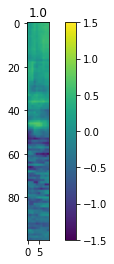

date:180327, rec:008, time:2782.0


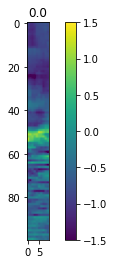

date:180414, rec:007, time:5098.0


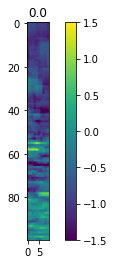

date:180324, rec:003, time:5918.0


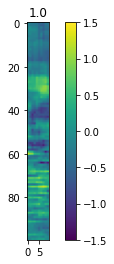

date:180325, rec:003, time:2846.0


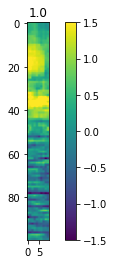

date:180324, rec:003, time:150.0


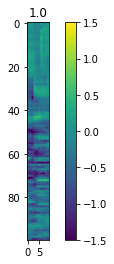

date:180327, rec:004, time:3365.0


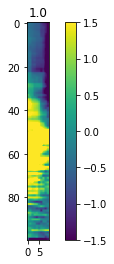

date:180324, rec:001, time:6707.0


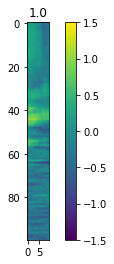

date:180411, rec:005, time:6569.0


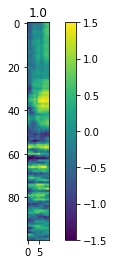

date:180325, rec:003, time:4493.0


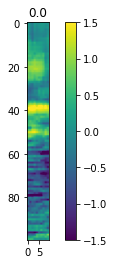

date:180413, rec:008, time:2035.0


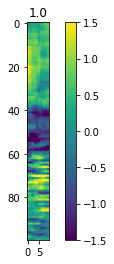

date:180322, rec:005, time:6909.0


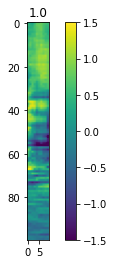

date:180324, rec:009, time:390.0


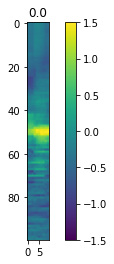

date:180324, rec:008, time:3423.0


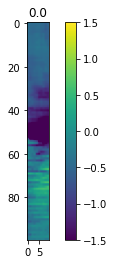

date:180413, rec:001, time:6717.0


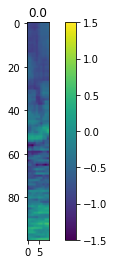

date:180327, rec:005, time:3580.0


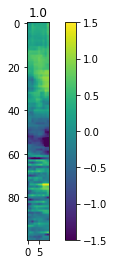

date:180324, rec:003, time:5578.0


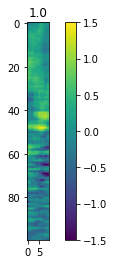

date:180414, rec:007, time:736.0


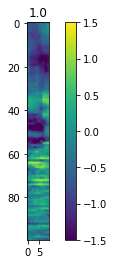

date:180325, rec:001, time:4426.0


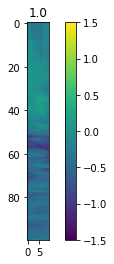

date:180411, rec:004, time:4287.0


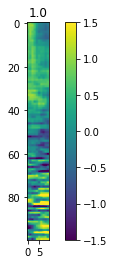

date:180327, rec:007, time:6621.0


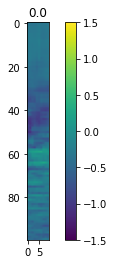

date:180413, rec:002, time:7111.0


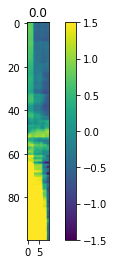

date:180414, rec:007, time:3657.0


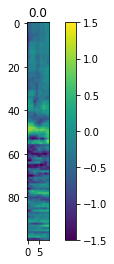

date:180413, rec:002, time:2561.0


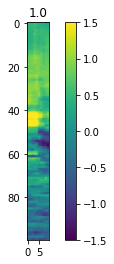

date:180325, rec:006, time:3173.0


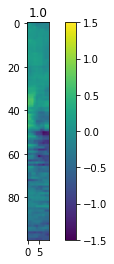

date:180414, rec:007, time:3517.0


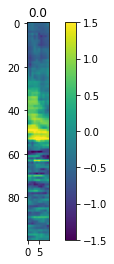

date:180414, rec:007, time:3647.0


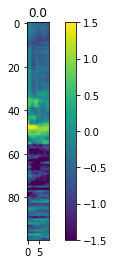

date:180323, rec:007, time:3035.0


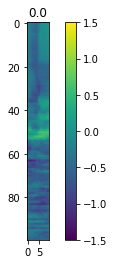

date:180327, rec:008, time:7009.0


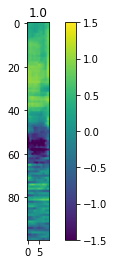

date:180327, rec:008, time:3412.0


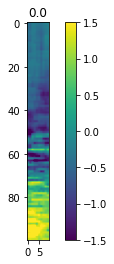

date:180414, rec:001, time:2150.0


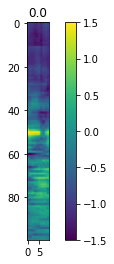

date:180413, rec:002, time:3941.0


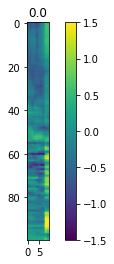

date:180327, rec:001, time:6275.0


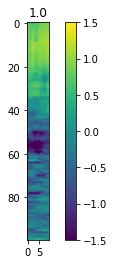

date:180414, rec:007, time:2007.0


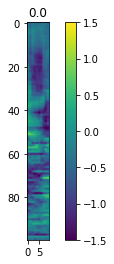

date:180327, rec:008, time:2412.0


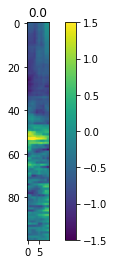

date:180413, rec:005, time:4717.0


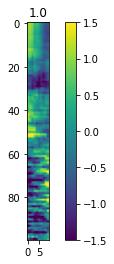

date:180410, rec:005, time:857.0


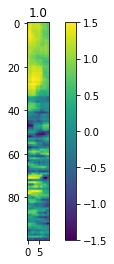

date:180327, rec:007, time:5011.0


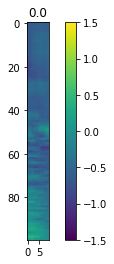

date:180323, rec:002, time:4786.0


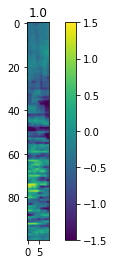

date:180322, rec:007, time:3339.0


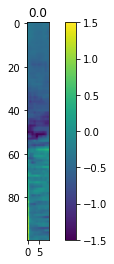

date:180323, rec:004, time:4959.0


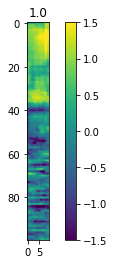

date:180410, rec:004, time:4749.0


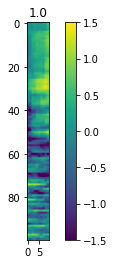

date:180411, rec:004, time:2049.0


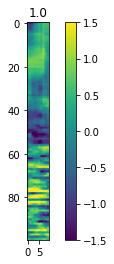

date:180324, rec:001, time:6797.0


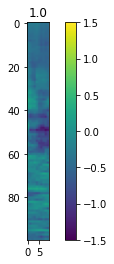

date:180413, rec:001, time:970.0


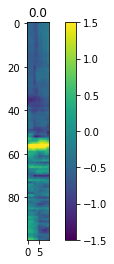

date:180409, rec:006, time:7088.0


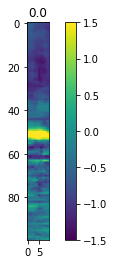

date:180413, rec:004, time:570.0


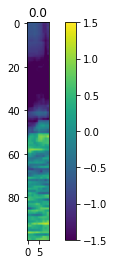

date:180412, rec:003, time:3391.0


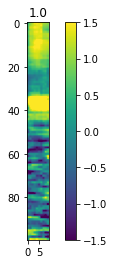

date:180413, rec:008, time:2439.0


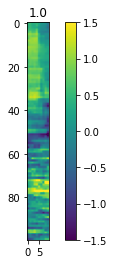

date:180327, rec:008, time:1067.0


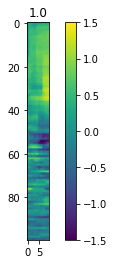

date:180414, rec:007, time:3957.0


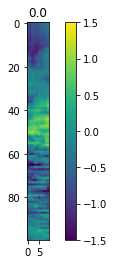

date:180322, rec:007, time:3910.0


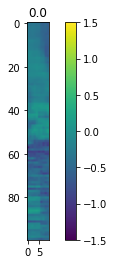

date:180327, rec:005, time:2223.0


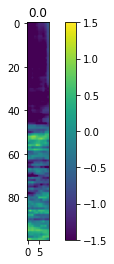

date:180325, rec:001, time:650.0


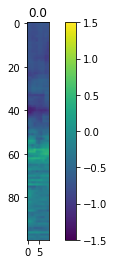

date:180413, rec:003, time:910.0


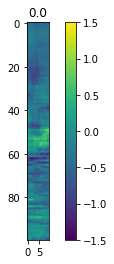

date:180412, rec:006, time:5078.0


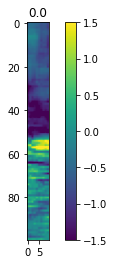

date:180413, rec:002, time:1030.0


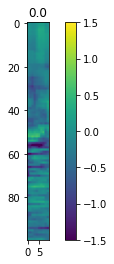

date:180327, rec:002, time:5734.0


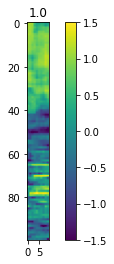

date:180413, rec:003, time:5951.0


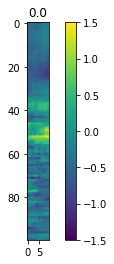

date:180327, rec:001, time:1940.0


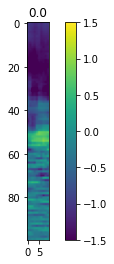

date:180322, rec:001, time:515.0


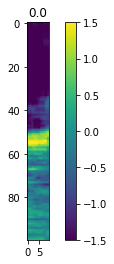

date:180414, rec:007, time:5618.0


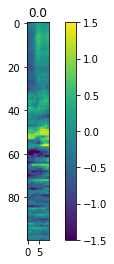

date:180413, rec:002, time:5601.0


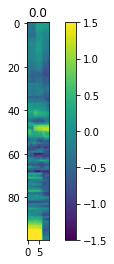

date:180326, rec:004, time:4795.0


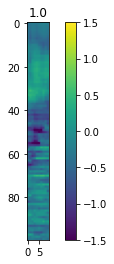

date:180324, rec:008, time:4919.0


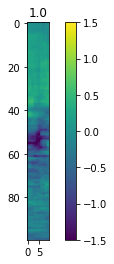

date:180324, rec:008, time:1251.0


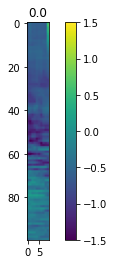

date:180412, rec:005, time:464.0


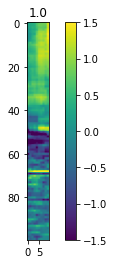

date:180327, rec:008, time:673.0


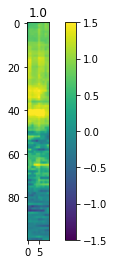

date:180327, rec:001, time:6872.0


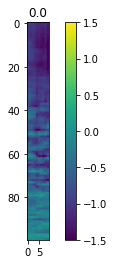

date:180410, rec:003, time:6992.0


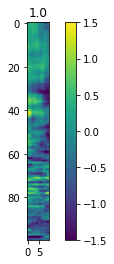

date:180324, rec:009, time:1147.0


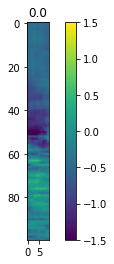

date:180324, rec:004, time:6242.0


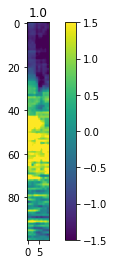

date:180327, rec:005, time:6048.0


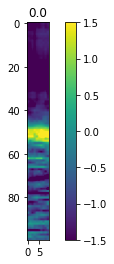

date:180327, rec:007, time:5041.0


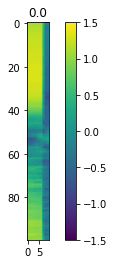

date:180327, rec:007, time:5191.0


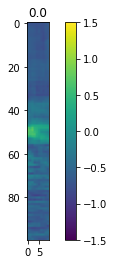

date:180413, rec:003, time:5981.0


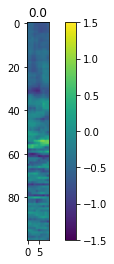

date:180413, rec:001, time:2050.0


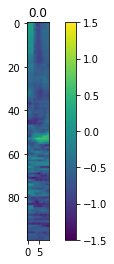

date:180325, rec:001, time:1070.0


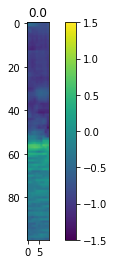

date:180409, rec:006, time:4948.0


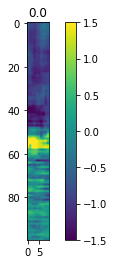

date:180414, rec:003, time:2612.0


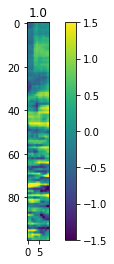

date:180414, rec:007, time:5108.0


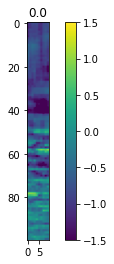

date:180325, rec:007, time:6533.0


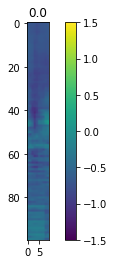

date:180412, rec:005, time:4219.0


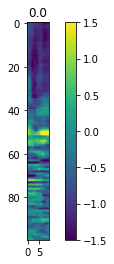

date:180324, rec:006, time:6103.0


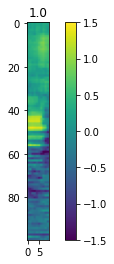

date:180411, rec:007, time:290.0


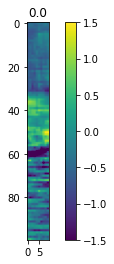

date:180414, rec:007, time:5828.0


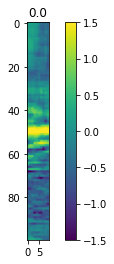

date:180323, rec:002, time:4995.0


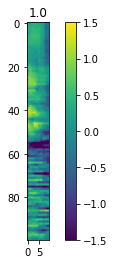

date:180410, rec:006, time:5772.0


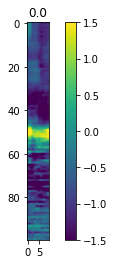

date:180325, rec:001, time:1070.0


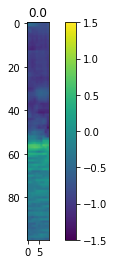

In [18]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [19]:
import time
start = time.time()
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
model_save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_10s_alldata_upsample'
timewindow = 10

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
end = time.time()
print(end - start)

0.9854214191436768


In [ ]:
import time
start = time.time()
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

end = time.time()
print(end - start)

Train loss for epoch 0: 0.6228327751159668
Val loss for epoch 0: 0.9677644371986389


In [ ]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [15]:
# best_epoch = 8

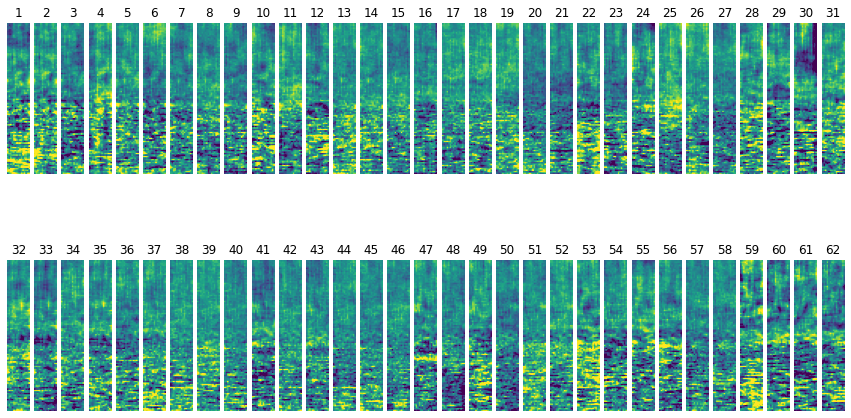

In [16]:
timewindow = 15
reg_type = 'none'
alpha = 0
model = GLM(62*100*timewindow).to(device)
path = model_save_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    plt.clim(-0.03, 0.03)
plt.show()

In [18]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.181103229522705 accuracy:0.7944403803950256


In [19]:
np.mean(np.concatenate(test_labels))

0.7444526

In [20]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

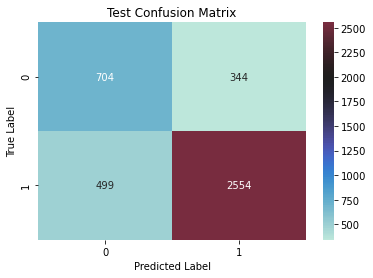

In [21]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:241.0, label:1.0
Original data 62 CH


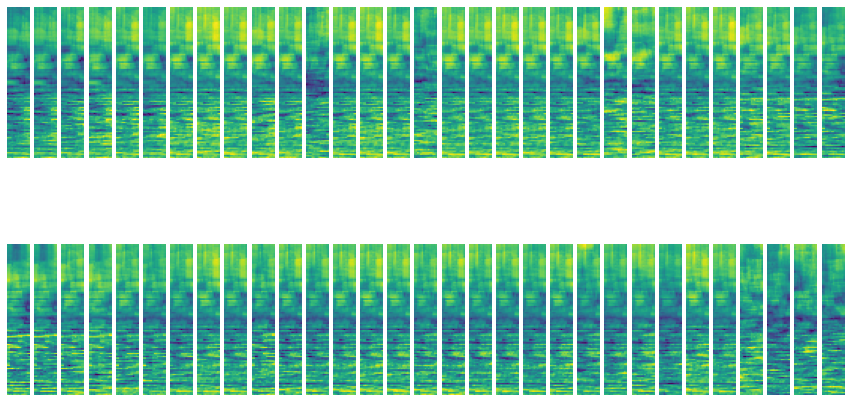

In [22]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [17]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
model_save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_15s_1st_1_upsample'
timewindow = 15
model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.7222763299942017
Val loss for epoch 0: 1.2217743396759033
Train loss for epoch 1: 0.4695741534233093
Val loss for epoch 1: 0.7761785984039307
1
Train loss for epoch 2: 0.33816981315612793
Val loss for epoch 2: 0.8164771199226379
Train loss for epoch 3: 0.38726532459259033
Val loss for epoch 3: 1.0431053638458252
Train loss for epoch 4: 0.33496391773223877
Val loss for epoch 4: 1.2726887464523315
Train loss for epoch 5: 0.27185800671577454
Val loss for epoch 5: 0.8330873847007751
Train loss for epoch 6: 0.2085828334093094
Val loss for epoch 6: 1.6932436227798462
Train loss for epoch 7: 0.3470171391963959
Val loss for epoch 7: 0.9553354382514954
Train loss for epoch 8: 0.30292174220085144
Val loss for epoch 8: 1.2551460266113281
Train loss for epoch 9: 0.22447453439235687
Val loss for epoch 9: 1.1409668922424316
Train loss for epoch 10: 0.22859935462474823
Val loss for epoch 10: 1.556289792060852
Train loss for epoch 11: 0.1958659142255783
Val loss for epoch 11:

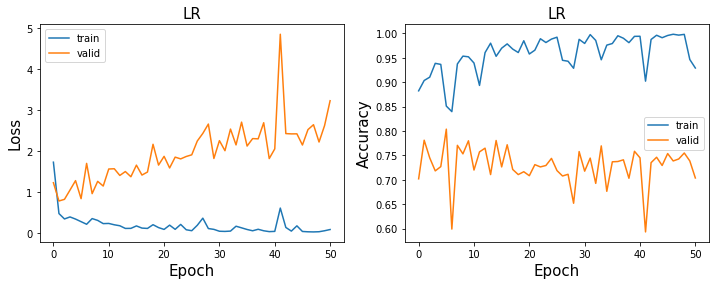

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

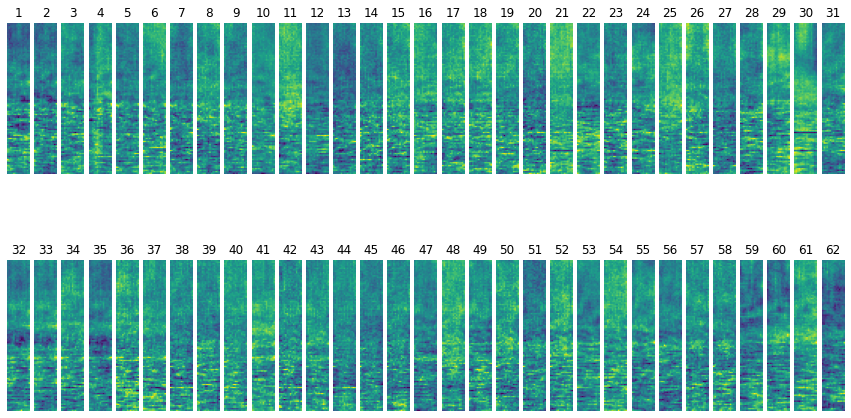

In [21]:
model = GLM(62*100*timewindow).to(device)
path = model_save_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [22]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7412582635879517 accuracy:0.811753230919288


In [23]:
np.mean(np.concatenate(test_labels))

0.7444526

In [24]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

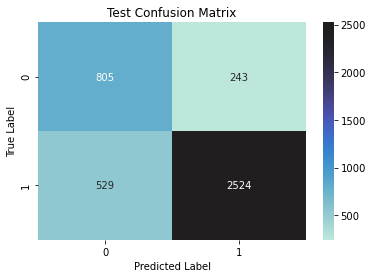

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2500)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


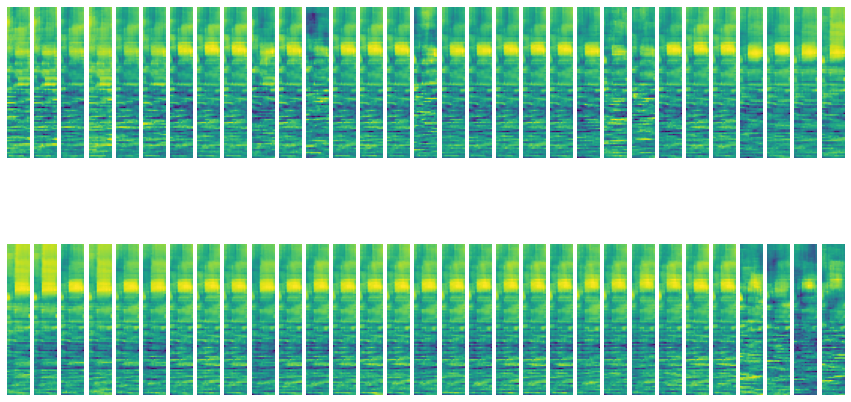

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [5]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
timewindow = 15
model_save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_15s_1st_1_upsample'

model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [6]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_save_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 4.198362350463867
Val loss for epoch 0: 0.9703077673912048
Train loss for epoch 1: 0.5162323713302612
Val loss for epoch 1: 0.7043149471282959
1
Train loss for epoch 2: 0.4358724057674408
Val loss for epoch 2: 1.1897462606430054
Train loss for epoch 3: 0.4197254776954651
Val loss for epoch 3: 1.4087414741516113
Train loss for epoch 4: 0.39464855194091797
Val loss for epoch 4: 1.134324550628662
Train loss for epoch 5: 0.3732725977897644
Val loss for epoch 5: 1.3208460807800293
Train loss for epoch 6: 0.2968161404132843
Val loss for epoch 6: 1.3421489000320435
Train loss for epoch 7: 0.22484630346298218
Val loss for epoch 7: 1.3358255624771118
Train loss for epoch 8: 0.2301364243030548
Val loss for epoch 8: 1.2257165908813477
Train loss for epoch 9: 0.17645782232284546
Val loss for epoch 9: 1.242738127708435


KeyboardInterrupt: 

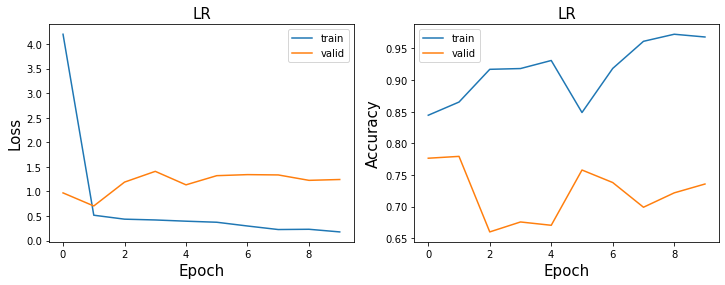

In [7]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

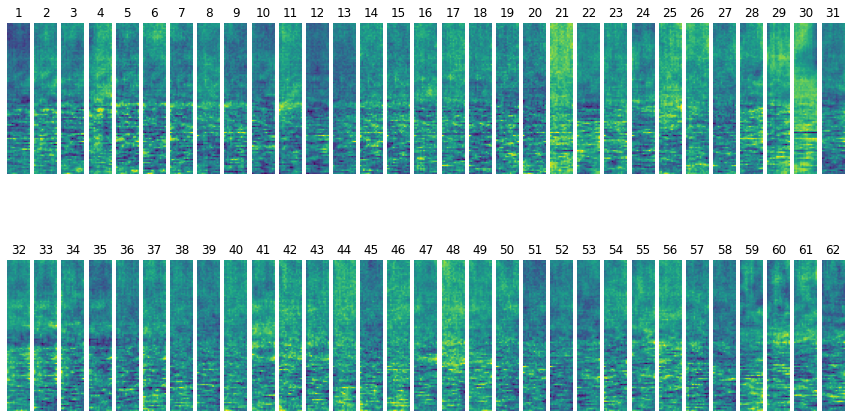

In [9]:
model = GLM(62*100*timewindow).to(device)
path = model_save_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [10]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.915207028388977 accuracy:0.8237015362106803


In [11]:
np.mean(np.concatenate(test_labels))

0.7444526

In [12]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

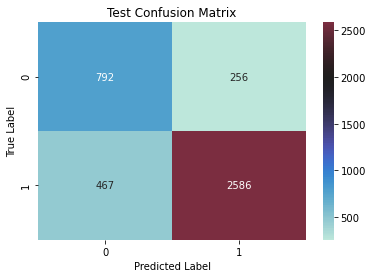

In [13]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:6545.0, label:1.0
Original data 62 CH


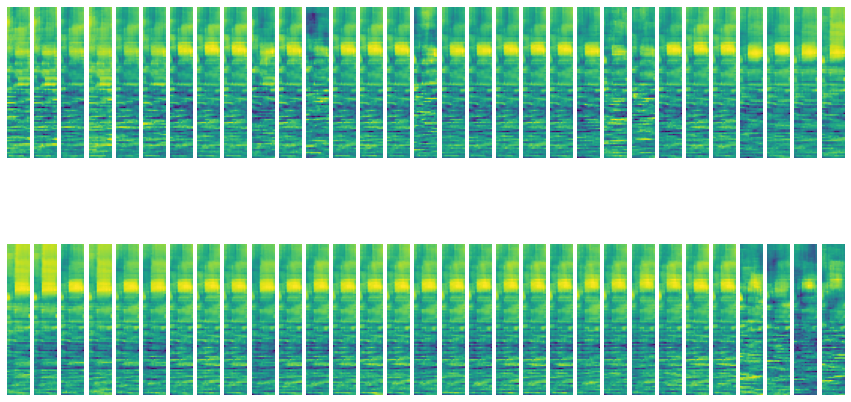

In [14]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

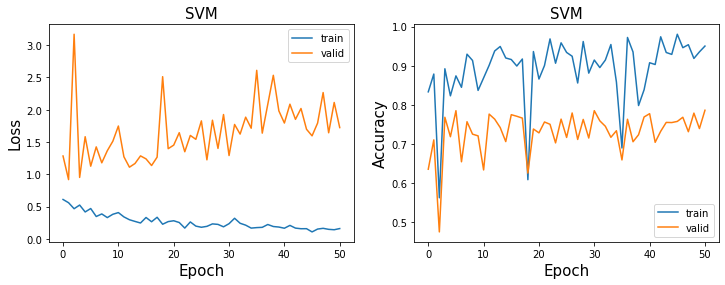

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

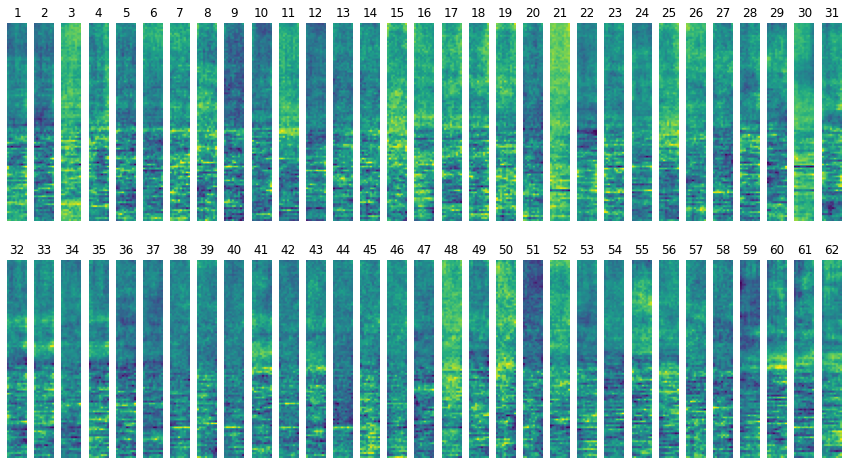

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


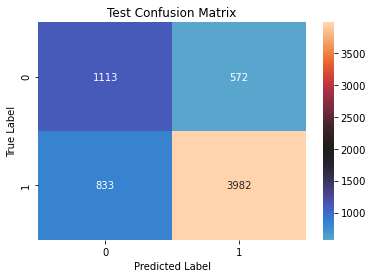

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


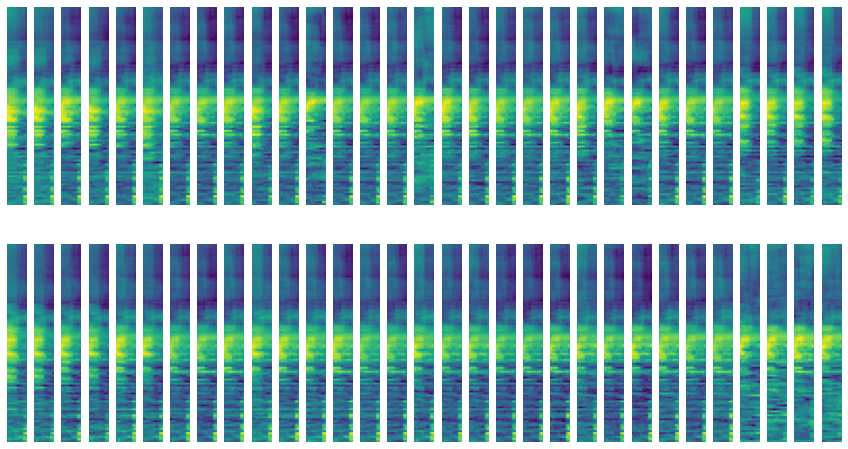

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

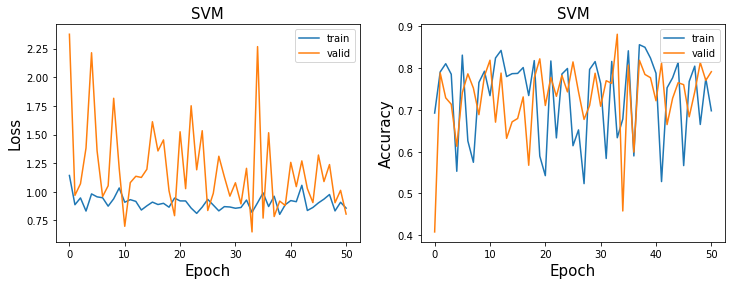

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

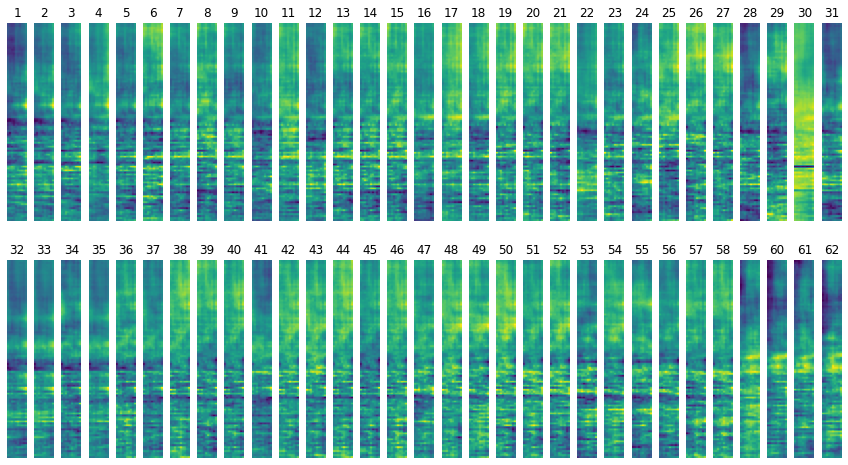

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


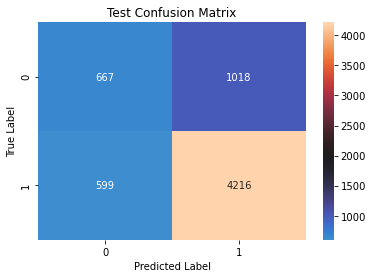

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


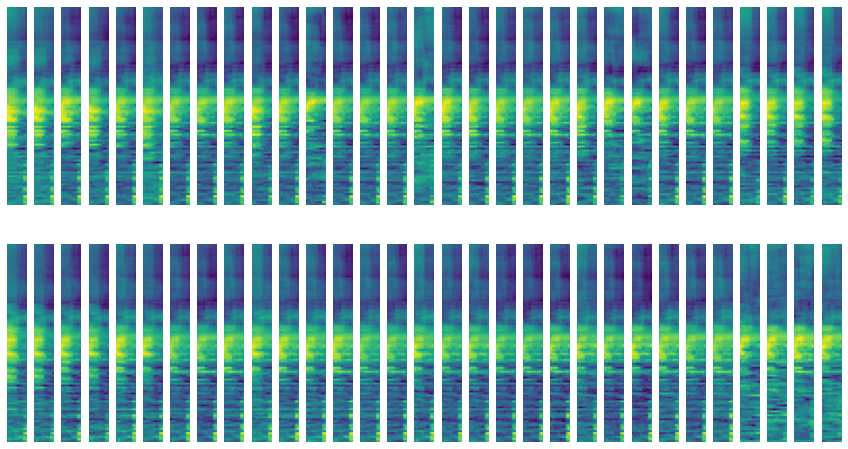

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

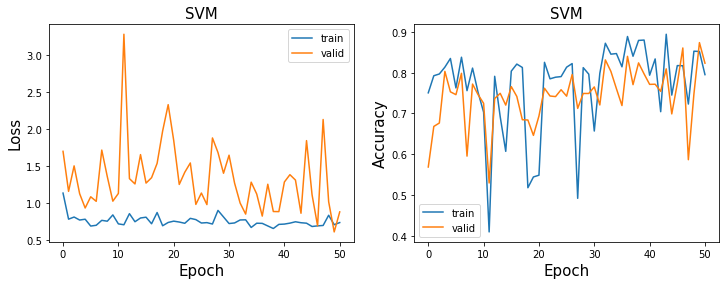

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

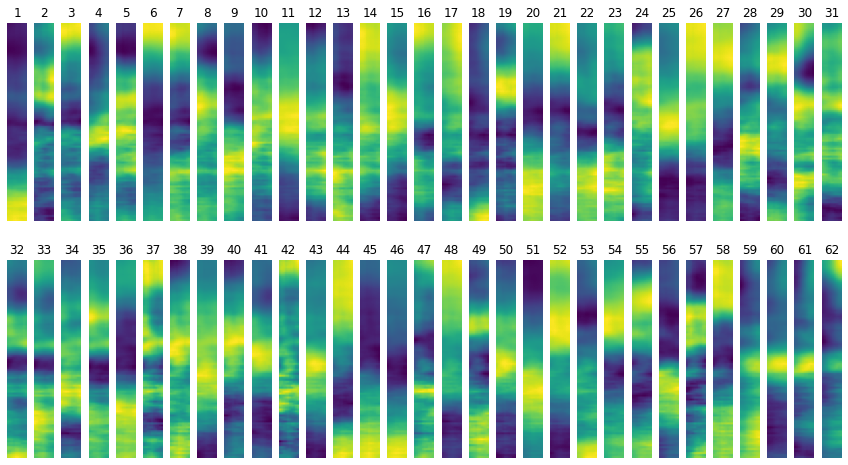

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


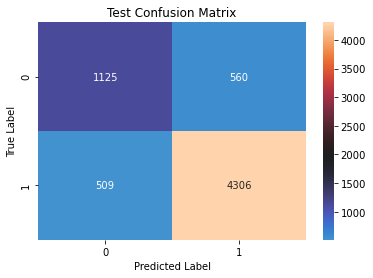

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


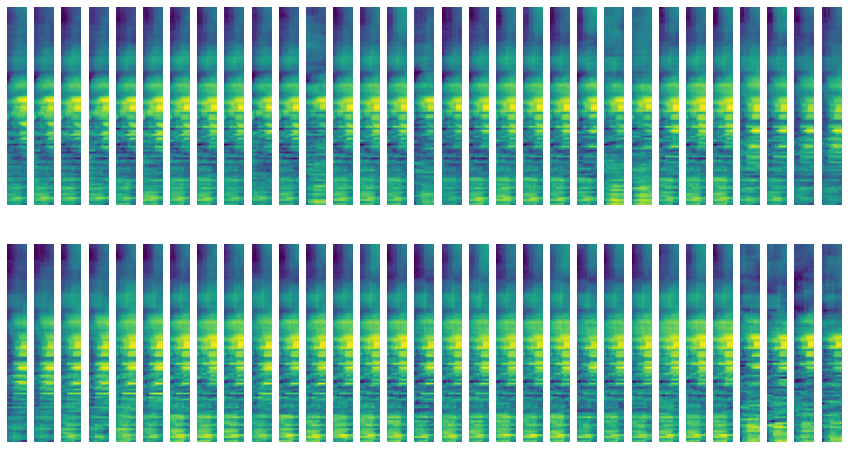

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()